## Author : Sakshi 

###  Prediction using Unsupervised ML

#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. Using  Python to perform this task

#### Dataset : https://bit.ly/3kXTdox
        

### Importing important libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets

### Loading the Iris Dataset  

In [4]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [5]:
#exploring the data set 

print(iris_df.head())
print(iris_df.tail())
print(iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count      

#### Calculating the within sum of squares and ideal k-value for k means clustering 


In [50]:
from sklearn.cluster import KMeans
wss = []
for i in range(1,11) : 
    kmean = KMeans(n_clusters =i ,init ='k-means++')
    kmean.fit(iris_df)
    wss.append(kmean.inertia_)
print(wss)

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.44618205128204, 39.30610712530712, 34.55725142208837, 30.235118920295413, 27.786092417308097, 26.354324010784545]


### plotting the wss values and finding optimum k 

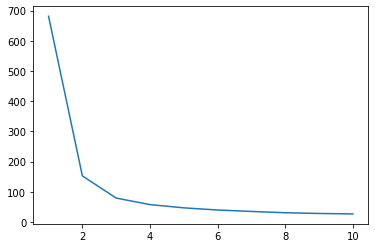

In [51]:
plt.plot(range(1,11),wss)

### applying k means  and predicting the clusters 

In [52]:
kmean = KMeans(n_clusters = 3 , init = 'k-means++')
y_kmean = kmean.fit_predict(iris_df)

In [53]:
print(y_kmean)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### concatenating the cluster number in a dataset

In [54]:
pd.concat([iris_df,pd.DataFrame(y_kmean)],axis = 1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### plotting the clusters 

[0 1 2]


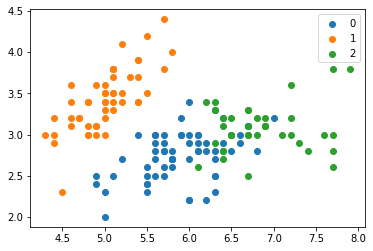

In [55]:
#Getting unique labels
u_labels = np.unique(y_kmean)
print(u_labels)


#plotting the results:
iris_df =np.array(iris_df)
for i in u_labels:
    plt.scatter(iris_df[y_kmean ==i ,0] ,iris_df[y_kmean == i,1] , label=i)
plt.legend()
plt.show()

### getting the centroid and plotting 

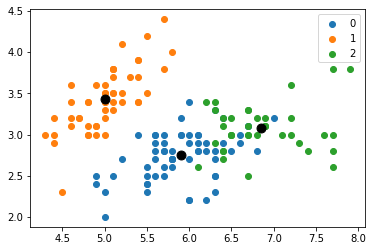

In [56]:
#Getting the Centroids
centroids = kmean.cluster_centers_
u_labels = np.unique(y_kmean)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(iris_df[y_kmean == i , 0] , iris_df[y_kmean == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

# End